# Modul Common untuk Data Science

## NumPy

Yang pertama adalah NumPy. Fitur NumPy utama ada tiga: fungsi matematikanya (misalnya `sin`, `log`, `floor`), submodul `random` (berguna untuk pengambilan sampel acak), dan objek NumPy `ndarray`.

Array NumPy mirip dengan matriks n-dimensi matematika. Sebagai contoh,

$$\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{d1} & x_{d2} & x_{d3} & \dots  & x_{dn}
\end{bmatrix}$$

Array NumPy bisa 1-dimensi (misalnya [1, 5, 20, 34, ...]), 2-dimensi (seperti di atas), atau banyak dimensi. Penting untuk dicatat bahwa semua baris dan kolom dari array 2 dimensi memiliki panjang yang sama. Itu akan berlaku untuk semua dimensi array.

Lihat perbedaan dengan “List” Python.

In [2]:
# untuk mengakses NumPy, kita harus mengimpornya
import numpy as np

In [3]:
list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
print(list_of_lists)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


In [4]:
an_array = np.array(list_of_lists)
print(an_array)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [6]:
non_rectangular = [[1, 2], [3, 4, 5], [6, 7, 8, 9]]
print(non_rectangular)

[[1, 2], [3, 4, 5], [6, 7, 8, 9]]


In [5]:
non_rectangular_array = np.array(non_rectangular)
print(non_rectangular_array)

NameError: name 'non_rectangular' is not defined

Mengapa hasil tercetak secara berbeda? Mari kita selidiki _shape_ dan _data type_ (`dtype`) mereka.

In [6]:
print(an_array.shape, an_array.dtype)
print(non_rectangular_array.shape, non_rectangular_array.dtype)

(3, 3) int32
(3,) object


Kasus pertama, `an_array`, adalah array 3x3 2 dimensi (dari bilangan bulat). Sebaliknya, `non_rectangular_array` adalah array 1 dimensi dengan panjang 3 (dari _objects_, yaitu objek `list`).

Kita juga dapat membuat berbagai array dengan fungsi NumPy.

In [7]:
np.linspace(1, 10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [8]:
np.arange(1, 10, 1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
np.logspace(1, 10, 10)

array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10])

In [10]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
np.diag([1,2,3,4])

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [12]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

Kita juga dapat mengonversi `dtype` dari array setelah dibuat.

In [13]:
print(np.logspace(1, 10, 10).dtype)
print(np.logspace(1, 10, 10).astype(int).dtype)

float64
int32


Mengapa semua ini penting?

Array seringkali lebih efisien dalam hal kode serta sumber daya komputasi untuk perhitungan tertentu. Secara komputasi, efisiensi ini berasal dari fakta bahwa kita telah mengalokasikan blok memori yang berdekatan untuk hasil perhitungan kita.

Untuk mengeksplorasi kelebihan yang ditawarkan dalam kode, mari kita coba menghitung angka-angka berikut ini.

Pertama, mari kita hitung jumlah semua angka dan lihat perbedaan kode yang diperlukan untuk `list_of_lists`, `an_array`, dan `non_rectangular_array`.


In [14]:
print(sum([sum(inner_list) for inner_list in list_of_lists]))
print(an_array.sum())

45
45


Menjumlahkan angka dalam array jauh lebih mudah daripada dalam list of lists. Kita tidak perlu "menggali" hierarki list, kita cukup menggunakan metode `sum` dari `ndarray`. Apakah ini masih berfungsi untuk `non_rectangular_array`?

In [15]:
# apa yang terjadi di sini?
print(non_rectangular_array.sum())

[1, 2, 3, 4, 5, 6, 7, 8, 9]


Ingat `non_rectangular_array` adalah array 1 dimensi dari objek `list`. Metode `sum` mencoba untuk menambahkannya bersama-sama: list pertama + list kedua + list ketiga. Penambahan list menghasilkan _concatenation_.

In [16]:
# concatenate three lists
print([1, 2] + [3, 4, 5] + [6, 7, 8, 9])

[1, 2, 3, 4, 5, 6, 7, 8, 9]


Perbedaan menjadi lebih jelas ketika kita mencoba menjumlahkan baris atau kolom satu per satu.

In [17]:
print('Array row sums: ', an_array.sum(axis=1))
print('Array column sums: ', an_array.sum(axis=0))

Array row sums:  [ 6 15 24]
Array column sums:  [12 15 18]


In [18]:
print('List of list row sums: ', [sum(inner_list) for inner_list in list_of_lists])

def column_sum(list_of_lists):
    running_sums = [0] * len(list_of_lists[0])
    for inner_list in list_of_lists:
        for i, number in enumerate(inner_list):
            running_sums[i] += number
            
    return running_sums

print('List of list column sums: ', column_sum(list_of_lists))

List of list row sums:  [6, 15, 24]
List of list column sums:  [12, 15, 18]


Umumnya jauh lebih "common" untuk melakukan operasi matematika dengan array daripada list.

In [19]:
a = np.array([1, 2, 3, 4, 5])
print(a + 5) # tambahkan skalar
print(a * 5) # kalikan dengan skalar
print(a / 5) # bagi dengan skalar (perhatikan float!)

[ 6  7  8  9 10]
[ 5 10 15 20 25]
[0.2 0.4 0.6 0.8 1. ]


In [20]:
b = a + 1
print(a + b) # menjumlahkan dua array
print(a * b) # kalikan dua array (dari segi elemen)
print(a / b.astype(float)) # bagi dua array (dari segi elemen)

[ 3  5  7  9 11]
[ 2  6 12 20 30]
[0.5        0.66666667 0.75       0.8        0.83333333]


Array juga dapat digunakan untuk aljabar linier, bertindak sebagai vektor, matriks, tensor, dll.

In [21]:
print(np.dot(a, b)) # inner product
print(np.outer(a, b)) # outer product

70
[[ 2  3  4  5  6]
 [ 4  6  8 10 12]
 [ 6  9 12 15 18]
 [ 8 12 16 20 24]
 [10 15 20 25 30]]


Array memiliki banyak hal untuk ditawarkan kepada kita dalam hal merepresentasikan dan menganalisis data, karena kita dapat dengan mudah menerapkan fungsi matematika ke kumpulan data atau bagian dari kumpulan data. Seringkali kita tidak akan mengalami masalah dalam menggunakan array, tetapi ada baiknya untuk memperhatikan batasan di sekitar shape dan tipe data.

Pembatasan seputar `shape` dan `dtype` ini memungkinkan objek `ndarray` menjadi jauh lebih berperforma dibandingkan dengan `list` Python umum. Ada beberapa alasan untuk ini, tetapi dua yang utama adalah hasil dari sifat `ndarray` yang diketik, karena ini memungkinkan penyimpanan memori yang baik dan pencarian fungsi yang konsisten. Ketika `list` Python dijumlahkan, Python perlu mencari tahu saat runtime cara yang benar untuk menambahkan setiap elemen list bersama-sama. Ketika `ndarray` dijumlahkan, `NumPy` sudah mengetahui jenis setiap elemen (dan mereka konsisten), sehingga dapat menjumlahkannya tanpa memeriksa fungsi add yang benar untuk setiap elemen.

Mari kita lihat hal ini dengan melakukan beberapa pengecekan dasar. Pertama kita akan membuat list 100000 elemen acak dan kemudian menghitung waktu fungsi penjumlahan.

In [22]:
time_list = [np.random.random() for _ in range(100000)]
time_arr = np.array(time_list)

In [23]:
%%timeit 
sum(time_list)

417 µs ± 27.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [24]:
%%timeit
np.sum(time_arr)

41.2 µs ± 2.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Universal functions

`NumPy` mendefinisikan `ufunc` yang memungkinkannya menjalankan fungsi secara efisien melalui array. Banyak dari fungsi-fungsi ini dibangun di dalamnya, seperti `np.cos`, dan diimplementasikan dalam kode `C` yang dikompilasi dengan kinerja tinggi. Fungsi-fungsi ini dapat melakukan `broadcasting` yang memungkinkan mereka untuk secara otomatis menangani operasi antara array dengan shape yang berbeda, misalnya dua array dengan shape yang sama, atau array dan skalar.

### Mengubah Shape

Seringkali kita ingin mengambil array yang merupakan one shape dan mengubahnya menjadi shape lain yang lebih sesuai untuk operasi tertentu.

In [25]:
mat = np.random.rand(20, 10)

In [26]:
mat.reshape(40, 5).shape

(40, 5)

In [27]:
mat.reshape(30, 5)

ValueError: cannot reshape array of size 200 into shape (30,5)

In [28]:
mat.ravel().shape

(200,)

In [29]:
mat.transpose().shape

(10, 20)

### Combining arrays

In [30]:
print(a)
print(b)

[1 2 3 4 5]
[2 3 4 5 6]


In [31]:
np.hstack((a, b))

array([1, 2, 3, 4, 5, 2, 3, 4, 5, 6])

In [32]:
np.vstack((a, b))

array([[1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6]])

In [33]:
np.dstack((a, b))

array([[[1, 2],
        [2, 3],
        [3, 4],
        [4, 5],
        [5, 6]]])

### Agregasi data dasar

Mari kita telusuri beberapa contoh lagi menggunakan array, kali ini menggunakan submodul `random` NumPy untuk membuat beberapa "data palsu". Simulasi data berguna untuk menguji dan membuat prototipe teknik atau kode baru, dan beberapa algoritme bahkan memerlukan input acak.

In [34]:
np.random.seed(42)
jan_coffee_sales = np.random.randint(25, 200, size=(4, 7))
print(jan_coffee_sales)

[[127 117  39 131  96  45 127]
 [146  99 112 141 124 128 176]
 [155 174  77  26 112 182  62]
 [154  45 185  82  46 113  73]]


In [35]:
# penjualan rata-rata
print('Rata-rata kopi terjual per hari: %d' % jan_coffee_sales.mean())

Rata-rata kopi terjual per hari: 110


In [36]:
# penjualan rata-rata Senin
print('Rata-rata kopi terjual pada hari Senin di bulan Januari: %d' % jan_coffee_sales[:, 1].mean())

Rata-rata kopi terjual pada hari Senin di bulan Januari: 108


In [37]:
# hari dengan penjualan terbanyak
# ingat kita menghitung tanggal dari 1, bukan 0!
print('Hari dengan penjualan tertinggi adalah Januari tanggal %d' % (jan_coffee_sales.argmax() + 1))

Hari dengan penjualan tertinggi adalah Januari tanggal 24


In [38]:
# apakah ada periodisitas mingguan?
from fractions import Fraction

normalized_sales = (jan_coffee_sales - jan_coffee_sales.mean()) / abs(jan_coffee_sales - jan_coffee_sales.mean()).max()
frequencies = [Fraction.from_float(f).limit_denominator() for f in np.fft.fftfreq(normalized_sales.size)]
power = np.abs(np.fft.fft(normalized_sales.ravel()))**2
list(zip(frequencies, power))[:len(power) // 2]

[(Fraction(0, 1), 4.930380657631324e-32),
 (Fraction(1, 28), 11.818508040667577),
 (Fraction(1, 14), 3.0624177128282795),
 (Fraction(3, 28), 3.6145035763808577),
 (Fraction(1, 7), 8.992489334676053),
 (Fraction(5, 28), 3.689054592513946),
 (Fraction(3, 14), 8.363267066546037),
 (Fraction(1, 4), 16.615944819859244),
 (Fraction(2, 7), 0.6736105397207648),
 (Fraction(9, 28), 6.846412421396466),
 (Fraction(5, 14), 14.279717692527932),
 (Fraction(11, 28), 17.951272090034657),
 (Fraction(3, 7), 4.608890497088778),
 (Fraction(13, 28), 6.579601542582696)]

Beberapa fungsi yang kita gunakan di atas tidak ada dalam Python standar dan disediakan untuk kita oleh NumPy. Selain itu, kita melihat bahwa kita dapat menggunakan bentuk array untuk membantu kita menghitung statistik pada subset data yang dimiliki (misalnya, jumlah rata-rata kopi yang terjual pada hari Senin). Tetapi salah satu hal paling powerful yang dapat kita lakukan untuk menjelajahi data adalah dengan memvisualisasikannya.

## Matplotlib

Matplotlib adalah library/pustaka plotting Python yang paling populer. Library ini memungkinkan kita untuk memvisualisasikan data dengan cepat dengan menyediakan berbagai jenis grafik (misalnya bar, scatter, line, dll). Matplotlib juga menyediakan alat yang berguna untuk mengatur beberapa gambar atau komponen gambar di dalam satu "figure", memungkinkan kita untuk membangun visualisasi yang lebih kompleks sesuai kebutuhan.

Mari kita visualisasikan beberapa data! Di sel berikutnya, kita akan membuat beberapa data. Untuk saat ini kita akan berfokus pada bagaimana grafik dihasilkan daripada bagaimana data dibuat.

In [39]:
import matplotlib.pyplot as plt

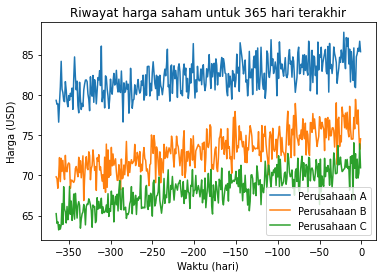

In [40]:
def gen_stock_price(days, initial_price):
    # harga saham naik atau turun secara linier
    # tidak melebihi 10% per tahun (heuristik)
    trend = initial_price * (np.arange(days) * .1 / 365 * np.random.rand() * np.random.choice([1, -1]) + 1)
    # noise akan menjadi sekitar 2%
    noise = .02 * np.random.randn(len(trend)) * trend
    return trend + noise

days = 365
initial_prices = [80, 70, 65]
for price in initial_prices:
    plt.plot(np.arange(-days, 0), gen_stock_price(days, price))
plt.title('Riwayat harga saham untuk %d hari terakhir' % days)
plt.xlabel('Waktu (hari)')
plt.ylabel('Harga (USD)')
plt.legend(['Perusahaan A', 'Perusahaan B', 'Perusahaan C']);

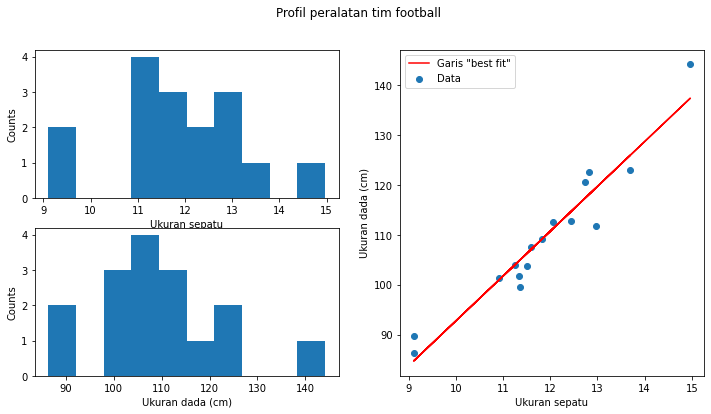

In [41]:
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt

def gen_football_team(n_players, mean_shoe, mean_jersey):
    shoe_sizes = np.random.normal(size=n_players, loc=mean_shoe, scale=.15 * mean_shoe)
    jersey_sizes = mean_jersey / mean_shoe * shoe_sizes + np.random.normal(size=n_players, scale=.05 * mean_jersey)

    return shoe_sizes, jersey_sizes

shoes, jerseys = gen_football_team(16, 11, 100)

fig = plt.figure(figsize=(12, 6))
fig.suptitle('Profil peralatan tim football')

ax1 = plt.subplot(221)
ax1.hist(shoes)
ax1.set_xlabel('Ukuran sepatu')
ax1.set_ylabel('Counts')

ax2 = plt.subplot(223)
ax2.hist(jerseys)
ax2.set_xlabel('Ukuran dada (cm)')
ax2.set_ylabel('Counts')

ax3 = plt.subplot(122)
ax3.scatter(shoes, jerseys, label='Data')
ax3.set_xlabel('Ukuran sepatu')
ax3.set_ylabel('Ukuran dada (cm)')

fit_line = linregress(shoes, jerseys)
ax3.plot(shoes, fit_line[1] + fit_line[0] * shoes, 'r', label='Garis "best fit"')

handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles[::-1], labels[::-1]);

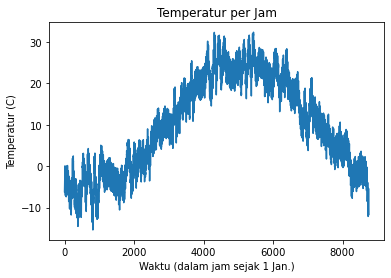

In [42]:
def gen_hourly_temps(days):
    ndays = len(days)
    seasonality = (-15 * np.cos((np.array(days) - 30) * 2.0 * np.pi / 365)).repeat(24) + 10
    solar = -3 * np.cos(np.arange(24 * ndays) * 2.0 * np.pi / 24)
    weather = np.interp(range(len(days) * 24), range(0, 24 * len(days), 24 * 2), 3 * np.random.randn(np.ceil(float(len(days)) / 2).astype(int)))
    noise = .5 * np.random.randn(24 * len(days))

    return seasonality + solar + weather + noise

days = np.arange(365)
hours = np.arange(days[0] * 24, (days[-1] + 1) * 24)
plt.plot(hours, gen_hourly_temps(days))
plt.title('Temperatur per Jam')
plt.xlabel('Waktu (dalam jam sejak 1 Jan.)')
plt.ylabel('Temperatur (C)');

Dalam contoh di atas kita telah menggunakan perintah `plot` di mana-mana, `subplot` untuk mengatur beberapa plot dalam satu gambar, dan `hist` untuk membuat histogram. Kami juga telah menggunakan "state machine" (yaitu menggunakan urutan perintah `plt.method`) dan "object-oriented" (yaitu membuat objek gambar dan mengubahnya) plotting paradigms. Package Matplotlib sangat fleksibel dan kemungkinan untuk memvisualisasikan data, sebagian besar dibatasi oleh imajinasi. Cara terbaik untuk menjelajahi Matplotlib dan package visualisasi data lainnya adalah dengan melihat [halaman galeri](https://matplotlib.org/gallery.html) mereka.

## Pandas

NumPy berguna untuk menangani data karena memungkinkan kita menerapkan fungsi secara efisien ke seluruh kumpulan data atau bagian tertentu dari data tersebut. Namun, mungkin sulit untuk melacak data terkait yang mungkin disimpan dalam array berbeda, atau data yang disimpan dalam baris atau kolom berbeda dari array yang sama.

Misalnya, di bagian sebelumnya kita memiliki array 1 dimensi untuk ukuran sepatu, dan array 1 dimensi lainnya untuk ukuran dada untuk jersey. Jika kita ingin mencari ukuran sepatu dan jersey untuk pemain tertentu, kita harus mengingat posisinya di setiap array.

Atau, kita dapat menggabungkan dua array 1 dimensi untuk membuat array 2 dimensi dengan baris `n_pemain` dan dua kolom (satu untuk ukuran sepatu, satu untuk ukuran jersey). Tapi begitu kita menggabungkan data, kita sekarang harus mengingat kolom mana yang ukuran sepatu dan kolom mana yang ukuran jersey.

Package Pandas memperkenalkan tool yang sangat kuat untuk bekerja dengan data menggunakan Python, yaitu DataFrame. DataFrame adalah sebuah tabel. Setiap kolom mewakili tipe data yang berbeda (terkadang disebut **field**). Kolom diberi nama, jadi kita bisa memiliki kolom bernama `'ukuran_sepatu'` dan kolom bernama `'ukuran_jersey'`. Kita tidak perlu mengingat kolom yang mana, karena kita bisa merujuknya dengan nama. Setiap baris mewakili **record** atau **entity** yang berbeda (mis. pemain). Kita juga dapat memberi nama baris, jadi alih-alih mengingat baris mana dalam array kita yang sesuai dengan Ronaldinho, kita dapat memberi nama baris 'Ronaldinho' dan mencari ukuran sepatu dan ukuran jerseynya berdasarkan nama.

In [43]:
import pandas as pd

pemain = ['Ronaldinho', 'Pele', 'Lionel Messi', 'Zinedine Zidane', 'Didier Drogba', 'Ronaldo', 'Yaya Toure', 
           'Frank Rijkaard', 'Diego Maradona', 'Mohamed Aboutrika', "Samuel Eto'o", 'George Best', 'George Weah', 
           'Roberto Donadoni']
sepatu, jersey = gen_football_team(len(pemain), 10, 100)

df = pd.DataFrame({'ukuran_sepatu': sepatu, 'ukuran_jersey': jersey}, index = pemain)

df

,ukuran_sepatu,ukuran_jersey
Ronaldinho,8.547275,92.500983
Pele,7.927346,80.277155
Lionel Messi,11.155075,101.037748
Zinedine Zidane,12.259221,119.224510
Didier Drogba,9.341725,89.126170
Ronaldo,8.291408,80.182757
Yaya Toure,6.312746,65.942012
Frank Rijkaard,8.528853,84.751303
Diego Maradona,9.829515,97.910820
Mohamed Aboutrika,12.398685,130.554214


In [44]:
# kita juga bisa membuat dataframe menggunakan zip

df = pd.DataFrame(list(zip(sepatu, jersey)), columns = ['ukuran_sepatu', 'ukuran_jersey'], index = pemain)

df

,ukuran_sepatu,ukuran_jersey
Ronaldinho,8.547275,92.500983
Pele,7.927346,80.277155
Lionel Messi,11.155075,101.037748
Zinedine Zidane,12.259221,119.224510
Didier Drogba,9.341725,89.126170
Ronaldo,8.291408,80.182757
Yaya Toure,6.312746,65.942012
Frank Rijkaard,8.528853,84.751303
Diego Maradona,9.829515,97.910820
Mohamed Aboutrika,12.398685,130.554214


DataFrame memiliki similaritas dengan `dict` dan `ndarray` NumPy. Misalnya, kita dapat mengambil kolom dari DataFrame dengan menggunakan namanya, sama seperti kita akan mengambil item dari `dict` menggunakan key-nya.

In [45]:
print(df['ukuran_sepatu'])

Ronaldinho            8.547275
Pele                  7.927346
Lionel Messi         11.155075
Zinedine Zidane      12.259221
Didier Drogba         9.341725
Ronaldo               8.291408
Yaya Toure            6.312746
Frank Rijkaard        8.528853
Diego Maradona        9.829515
Mohamed Aboutrika    12.398685
Samuel Eto'o         11.009701
George Best          10.457628
George Weah           9.399821
Roberto Donadoni      9.125251
Name: ukuran_sepatu, dtype: float64


Dan kita dapat dengan mudah menerapkan fungsi ke DataFrame, seperti yang kita lakukan dengan array NumPy.

In [46]:
print(np.log(df))

                   ukuran_sepatu  ukuran_jersey
Ronaldinho              2.145612       4.527219
Pele                    2.070318       4.385485
Lionel Messi            2.411895       4.615494
Zinedine Zidane         2.506278       4.781008
Didier Drogba           2.234491       4.490053
Ronaldo                 2.115220       4.384308
Yaya Toure              1.842571       4.188776
Frank Rijkaard          2.143455       4.439721
Diego Maradona          2.285390       4.584057
Mohamed Aboutrika       2.517590       4.871789
Samuel Eto'o            2.398777       4.669221
George Best             2.347332       4.735297
George Weah             2.240691       4.506914
Roberto Donadoni        2.211045       4.518506


In [47]:
df.mean()

ukuran_sepatu     9.613161
ukuran_jersey    96.025702
dtype: float64

Pertama kita perlu tahu cara mengambil, menambah, dan menghapus data dari DataFrame.

Kita telah melihat cara mengambil kolom, bagaimana dengan mengambil baris? Sintaks yang paling fleksibel adalah dengan menggunakan metode `loc` DataFrame.

In [48]:
print(df.loc['Ronaldo'])

ukuran_sepatu     8.291408
ukuran_jersey    80.182757
Name: Ronaldo, dtype: float64


In [49]:
print(df.loc[['Ronaldo', 'George Best'], 'ukuran_sepatu'])

Ronaldo         8.291408
George Best    10.457628
Name: ukuran_sepatu, dtype: float64


In [50]:
# juga dapat memilih slice data berdasarkan posisi
print(df.loc['Ronaldo':'George Best', 'ukuran_sepatu'])

Ronaldo               8.291408
Yaya Toure            6.312746
Frank Rijkaard        8.528853
Diego Maradona        9.829515
Mohamed Aboutrika    12.398685
Samuel Eto'o         11.009701
George Best          10.457628
Name: ukuran_sepatu, dtype: float64


In [51]:
# untuk pengindeksan berbasis posisi, kita biasanya akan menggunakan iloc
print(df.iloc[:5])

                 ukuran_sepatu  ukuran_jersey
Ronaldinho            8.547275      92.500983
Pele                  7.927346      80.277155
Lionel Messi         11.155075     101.037748
Zinedine Zidane      12.259221     119.224510
Didier Drogba         9.341725      89.126170


In [52]:
print(df.iloc[2:4, 0])

Lionel Messi       11.155075
Zinedine Zidane    12.259221
Name: ukuran_sepatu, dtype: float64


In [53]:
# untuk hanya melihat bagian atas DataFrame, gunakan head
df.head()

,ukuran_sepatu,ukuran_jersey
Ronaldinho,8.547275,92.500983
Pele,7.927346,80.277155
Lionel Messi,11.155075,101.037748
Zinedine Zidane,12.259221,119.224510
Didier Drogba,9.341725,89.126170


In [54]:
# untuk bagian bawah gunakan tail
df.tail()

,ukuran_sepatu,ukuran_jersey
Mohamed Aboutrika,12.398685,130.554214
Samuel Eto'o,11.009701,106.614700
George Best,10.457628,113.897279
George Weah,9.399821,90.641667
Roberto Donadoni,9.125251,91.698505


Seperti halnya `dict`, kita dapat menambahkan data ke DataFrame hanya dengan menggunakan sintaks yang sama seperti yang kita gunakan untuk mengambil data, tetapi mencocokkannya dengan satu assignment.

In [55]:
# menambahkan kolom baru
df['position'] = np.random.choice(['goaltender', 'defense', 'midfield', 'attack'], size=len(df))
df.head()

,ukuran_sepatu,ukuran_jersey,position
Ronaldinho,8.547275,92.500983,goaltender
Pele,7.927346,80.277155,defense
Lionel Messi,11.155075,101.037748,goaltender
Zinedine Zidane,12.259221,119.224510,defense
Didier Drogba,9.341725,89.126170,attack


In [56]:
# menambahkan baris baru
df.loc['Dylan'] = {'jersey_size': 91, 'shoe_size': 9, 'position': 'midfield'}
df.loc['Dylan']

ukuran_sepatu         NaN
ukuran_jersey         NaN
position         midfield
Name: Dylan, dtype: object

Untuk menghapus data, kita dapat menggunakan metode `drop` DataFrame.

In [57]:
df.drop('Dylan')

,ukuran_sepatu,ukuran_jersey,position
Ronaldinho,8.547275,92.500983,goaltender
Pele,7.927346,80.277155,defense
Lionel Messi,11.155075,101.037748,goaltender
Zinedine Zidane,12.259221,119.224510,defense
Didier Drogba,9.341725,89.126170,attack
Ronaldo,8.291408,80.182757,defense
Yaya Toure,6.312746,65.942012,midfield
Frank Rijkaard,8.528853,84.751303,midfield
Diego Maradona,9.829515,97.910820,attack
Mohamed Aboutrika,12.398685,130.554214,goaltender


In [58]:
df.drop('position', axis=1)

,ukuran_sepatu,ukuran_jersey
Ronaldinho,8.547275,92.500983
Pele,7.927346,80.277155
Lionel Messi,11.155075,101.037748
Zinedine Zidane,12.259221,119.224510
Didier Drogba,9.341725,89.126170
Ronaldo,8.291408,80.182757
Yaya Toure,6.312746,65.942012
Frank Rijkaard,8.528853,84.751303
Diego Maradona,9.829515,97.910820
Mohamed Aboutrika,12.398685,130.554214


Perhatikan saat kita mengeksekusi `df.drop('position', axis=1)`, ada entri untuk `Dylan` meskipun kita baru saja mengeksekusi `df.drop('Dylan')`. Kita harus berhati-hati saat menggunakan `drop`; banyak fungsi DataFrame mengembalikan _copy_ dari DataFrame. Untuk membuat perubahan permanen, kita perlu menetapkan kembali `df` ke salinan yang dikembalikan oleh `df.drop()` atau kita harus menggunakan kata kunci `inplace`.

In [59]:
df = df.drop('Dylan')
print(df)

                   ukuran_sepatu  ukuran_jersey    position
Ronaldinho              8.547275      92.500983  goaltender
Pele                    7.927346      80.277155     defense
Lionel Messi           11.155075     101.037748  goaltender
Zinedine Zidane        12.259221     119.224510     defense
Didier Drogba           9.341725      89.126170      attack
Ronaldo                 8.291408      80.182757     defense
Yaya Toure              6.312746      65.942012    midfield
Frank Rijkaard          8.528853      84.751303    midfield
Diego Maradona          9.829515      97.910820      attack
Mohamed Aboutrika      12.398685     130.554214  goaltender
Samuel Eto'o           11.009701     106.614700     defense
George Best            10.457628     113.897279    midfield
George Weah             9.399821      90.641667     defense
Roberto Donadoni        9.125251      91.698505    midfield


In [60]:
df.drop('position', axis=1, inplace=True)
print(df)

                   ukuran_sepatu  ukuran_jersey
Ronaldinho              8.547275      92.500983
Pele                    7.927346      80.277155
Lionel Messi           11.155075     101.037748
Zinedine Zidane        12.259221     119.224510
Didier Drogba           9.341725      89.126170
Ronaldo                 8.291408      80.182757
Yaya Toure              6.312746      65.942012
Frank Rijkaard          8.528853      84.751303
Diego Maradona          9.829515      97.910820
Mohamed Aboutrika      12.398685     130.554214
Samuel Eto'o           11.009701     106.614700
George Best            10.457628     113.897279
George Weah             9.399821      90.641667
Roberto Donadoni        9.125251      91.698505
